https://miro.com/welcomeonboard/2u7KoSE58auS6YI1cwapJV473d1rqTuUAgjM8cvehHN1pUDA28SRN4BpNQRFM7w5

Voilà le lien vers notre schéma de la dernière fois. Pour rappel, on s'est dit pour la prochaine session : pandas de base

    load csv
    Series et DataFrames
    Indexation
    loc vs iloc
    sorting
    Valeurs manquantes

Scikit-learn

    Fit, predict
    train test split
    métriques
    pielines ?

Dataviz

    Matplotlib
    Pandas plot

# Pandas

## Introduction

Lors de la formation sur les bases de Python, on a appris à manipuler les types de bases de Python ; listes, dictionnaires, ...
On a vu que Python était un langage généraliste, qui n'est pas spécialisé dans le traitement de données. Les types de base se prêtent donc mal aux calculs mathématiques.

Ainsi, la notion d'addition de listes n'est pas l'addition mathématique terme à terme, mais plutôt la concaténation.

In [1]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

Et l'addition d'un scalaire à une liste n'est pas possible.

In [2]:
try:
    [1, 2, 3] + 4
except:
    print("Python ne sait pas faire ça !")

Python ne sait pas faire ça !


Mais ces limitations initiales peuvent être comblées facilement par ce qui fait la force de Python : l'utilisation de packages spécialisés.

Par exemple, Numpy apporte le calcul matriciel. Par habitude et flemme, on l'importe toujours sous le nom **np**.

In [3]:
import numpy as np

np.array([1,2,3]) + 4

array([5, 6, 7])

Mais la puissance de Numpy pour le calcul matriciel et scientifique n'est pas forcément suffisant pour faire du traitement de données. On souhaiterait avoir des objets et des opérations de plus haut niveau. Par exemple les data frames, objets centraux en R, permettent de manipuler plusieurs listes en gardant une cohérence. Et on souhaiterait pouvoir manipuler une ou plusieurs colonnes pour réaliser des opérations complexes (group by, ...).

C'est ce pour quoi Pandas a été développé !

## L'objet de base de Pandas : Series

### Création

Pandas s'importe usuellement sous le nom **pd**

In [4]:
import pandas as pd

L'objet le plus fondamental dans Pandas est la série (**Series**). Il permet de représenter une série de données, c'ets-à-dire une liste unidimensionnelle d'objets de tout type. Chaque donnée dispose d'un label. Ces labels forment ce qu'on appelle l'**index** de la série.

In [5]:
pd.Series([1, 'toto', None], index=['a', 'b', 'c'])

a       1
b    toto
c    None
dtype: object

Si on ne précise pas d'index, Pandas utilise les numéros de lignes (en commençant à 0).

In [6]:
pd.Series([1, 'toto', None])

0       1
1    toto
2    None
dtype: object

### Manipulation

Soient les séries suivantes

In [7]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [8]:
s2 = pd.Series([1, 2, 3], index=['c', 'b', 'd'])
s2

c    1
b    2
d    3
dtype: int64

Que donne $s+1$ ?

In [9]:
s + 1

a    2
b    3
c    4
dtype: int64

Que donne $s + s2$ ?

In [10]:
s + s2

a    NaN
b    4.0
c    4.0
d    NaN
dtype: float64

On voit déjà une différence notable avec Numpy. L'addition de deux séries alignent les index, pour additionner les lignes correspondantes.

### Indexation

L'index permet d'extraire un élément de la série directement par son label

In [11]:
s['b']

2

On peut aussi faire de l'indexation booléenne 

In [12]:
s[[True, False, True]]

a    1
c    3
dtype: int64

On peut aussi sélectionner par numéro de ligne, avec la même syntaxe. Pandas se débrouille pour savoir si on parle d'un index ou d'un numéro de ligne.

In [13]:
s[1]

2

Comme sur les listes, on peut prendre des tranches (slicing)

In [14]:
s[1:]

b    2
c    3
dtype: int64

In [15]:
s[-1]

3

On peut modifier ou ajouter des éléments

In [16]:
s['d'] = 4

s

a    1
b    2
c    3
d    4
dtype: int64

In [17]:
s[3] = 0

s

a    1
b    2
c    3
d    0
dtype: int64

### Loc et iloc

On a vu que s[x] peut signifier soit l'élément ayant le label x, soit le x-ème élément si c'est un nombre. Pandas sait choisir la bonne signification... quand il n'y a pas d'ambiguïté.

In [18]:
s = pd.Series(['a', 'b', 'c'], index=[2, 3, 4])
s

2    a
3    b
4    c
dtype: object

In [19]:
s[2]

'a'

Pour prendre l'élement n°2, il faut être plus explicite dans notre façon d'indexer. Pandas met à disposition deux indexeurs :

.loc permet d'accéder par label

.iloc permet d'accéder par numéro

In [20]:
s.loc[2]

'a'

In [21]:
s.iloc[2]

'c'

## L'objet le plus utilie : le DataFrame

### Création

Un DataFrame est une structure bidimensionnel. Il s'agit d'un ensemble de Series. On peut le construire par exemple à partir d'un dict dont les valeurs sont des Series.

In [22]:
s1 = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], index = ['c', 'b', 'd'])

df = pd.DataFrame({'toto': s1, 'titi': s2})

df

,toto,titi
a,1.0,NaN
b,2.0,5.0
c,3.0,4.0
d,NaN,6.0


Il existe de nombreuses autres façons de construire un DataFrame. Par exemple à partir d'un dict de lists :

In [23]:
d = {'toto': [1, 2, 3, np.nan], 'titi': [np.nan, 5, 4, 6]}

pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,toto,titi
a,1.0,NaN
b,2.0,5.0
c,3.0,4.0
d,NaN,6.0


Ou encore une liste de listes. On peut alors préciser l'index et le nom des colonnes (sinon Pandas utilise des numéros).

In [24]:
pd.DataFrame([[1, np.nan], [2, 5], [3, 4], [np.nan, 6]], index=['a', 'b', 'c', 'd'], columns=['toto', 'titi'])

,toto,titi
a,1.0,NaN
b,2.0,5.0
c,3.0,4.0
d,NaN,6.0


### Manipulation

#### Indexation

Les crochets permettent d'extraire une colonne.

In [25]:
df['toto']

a    1.0
b    2.0
c    3.0
d    NaN
Name: toto, dtype: float64

Il s'agit alors d'une Series

In [26]:
type(df['toto'])

pandas.core.series.Series

On peut aussi utiliser :

In [27]:
df.toto

a    1.0
b    2.0
c    3.0
d    NaN
Name: toto, dtype: float64

Pour extraire une ligne, on peut utiliser **loc** et **iloc**.

In [28]:
df.loc['a']

toto    1.0
titi    NaN
Name: a, dtype: float64

In [29]:
type(df.loc['a'])

pandas.core.series.Series

In [30]:
df.loc[['a', 'c']]

,toto,titi
a,1.0,NaN
c,3.0,4.0


In [31]:
type(df.loc[['a', 'c']])

pandas.core.frame.DataFrame

In [32]:
df.iloc[-2:]

,toto,titi
c,3.0,4.0
d,NaN,6.0


Pour extraire plusieurs lignes, on peut aussi utiliser des crochets

In [33]:
df[0:2]

,toto,titi
a,1.0,NaN
b,2.0,5.0


Par contre, pour une seule ligne cela ne marche pas. Il faut utiliser iloc.

In [34]:
try:
    df[0]
except:
    print("Il n'y a pas de colonne nommée '0'")

Il n'y a pas de colonne nommée '0'


Pour extraire un élément, on peut sélectionner la série puis l'élément

In [35]:
df['toto']['b']

2.0

Plus directement, on peut passer la ligne et la colonne à loc et iloc

In [36]:
df.loc['b', 'toto']

2.0

In [37]:
df.iloc[1, 0]

2.0

Pour toutes ces fonctions, on peut faire du slicing, ou passer des listes, pour extraire plusieurs éléments

On peut aussi faire de l'indexation booléenne, pour sélectionner des lignes suivant une condition

In [38]:
df[df['toto'] > 1]

,toto,titi
b,2.0,5.0
c,3.0,4.0


#### Manipulations globales

On a vu comment extraire des lignes ou des colonnes, mais il existe aussi de nombreuses fonctions s'appliquant à l'ensemble du data frame. Ces fonctions sont disponibles sous la forme *objet.fonction* (en termes de programmation orientée objet, ce sont des méthodes de l'objet).

##### Voir les premières lignes

In [39]:
df.head(2)

,toto,titi
a,1.0,NaN
b,2.0,5.0


##### Trier

Suivant l'index

In [40]:
df.sort_index(ascending=False)

,toto,titi
d,NaN,6.0
c,3.0,4.0
b,2.0,5.0
a,1.0,NaN


Suivant une colonne

In [41]:
df.sort_values('titi')

,toto,titi
c,3.0,4.0
b,2.0,5.0
d,NaN,6.0
a,1.0,NaN


Ces fonctions retournent un nouveau DataFrame et ne modifient pas l'objet d'origine. Il faut les assigner à un nouvel objet (avec le même nom ou pas), ou utiliser l'argument *inplace=True*.

Cela permet aussi d'enchaîner les fonctions.

In [42]:
df.sort_values('titi').head(2)

,toto,titi
c,3.0,4.0
b,2.0,5.0


##### Compter les occurrences des valeurs

In [43]:
df['toto'].value_counts()

3.0    1
2.0    1
1.0    1
Name: toto, dtype: int64

##### Gestion des valeurs manquantes

In [44]:
df.dropna()

,toto,titi
b,2.0,5.0
c,3.0,4.0


In [45]:
df.fillna(0)

,toto,titi
a,1.0,0.0
b,2.0,5.0
c,3.0,4.0
d,0.0,6.0


##### Opérations mathématiques

In [46]:
df.sum()

toto     6.0
titi    15.0
dtype: float64

In [47]:
df.mean()

toto    2.0
titi    5.0
dtype: float64

Ces fonctions ignorent les valeurs manquantes par défaut (argument *skipna*)

Pour calculer la moyenne des lignes plutôt que des colonnes.

In [48]:
df.mean(axis=1)

a    1.0
b    3.5
c    3.5
d    6.0
dtype: float64

##### Group by

In [49]:
df['is_na'] = df['titi'].isnull()

df.groupby('is_na').mean()

,toto,titi
is_na,,
False,2.5,5.0
True,1.0,NaN


### Import et export

Il est possible d'importer et d'exporter vers de nombreux formats de fichiers.

Pour l'export, on utilise les méthodes du data frame nommées *to_** (to_csv, to_excel, ...)

In [50]:
df.to_csv('df.csv')

Pour l'import, l'objet n'existe pas encore, on utilise donc les fonctions de Pandas nommées *read_** qui retournent un data frame.

In [51]:
pd.read_csv('df.csv')

,Unnamed: 0,toto,titi,is_na
0,a,1.0,NaN,True
1,b,2.0,5.0,False
2,c,3.0,4.0,False
3,d,NaN,6.0,False


On voit que par défaut l'export écrit l'index comme une colonne normale. Mais l'import ne le charge pas comme index par défaut. On peut préciser l'argument *index_col* pour indiquer le numéro de la colonne qui doit servir d'index.

In [52]:
pd.read_csv('df.csv', index_col=0)

,toto,titi,is_na
a,1.0,NaN,True
b,2.0,5.0,False
c,3.0,4.0,False
d,NaN,6.0,False


# Graphiques

Pour réaliser des graphiques, il existe de nombreux packages. Les plus courants sont les suivants.

1. **Matplotlib** : le package le plus ancien, que l'on va voir dans la suite

1. **Seaborn** : une surcouche à Matplotlib qui permet de tracer des graphiques statistiques poussés et améliore l'esthétique

1. **Plotly** : aussi disponible en R, il permet de faire des graphiques interactifs. Il fournit aussi **Plotly express** pour faire rapidement des graphiques avec une approche "grammaire de graphiques"

1. **Bokeh** : pour faire des graphiques interactifs complexes

1. **Altair** : qui combine "grammaire de graphiques" et interactivité et reposant sur un langage de spécification de visualisations (Vega)

Pour avoir une vision plus détaillée de cet écosystème riche, on peut par exemple voir cette présentation du créateur d'Altair : https://www.youtube.com/watch?v=FytuB8nFHPQ (slides : https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017 )

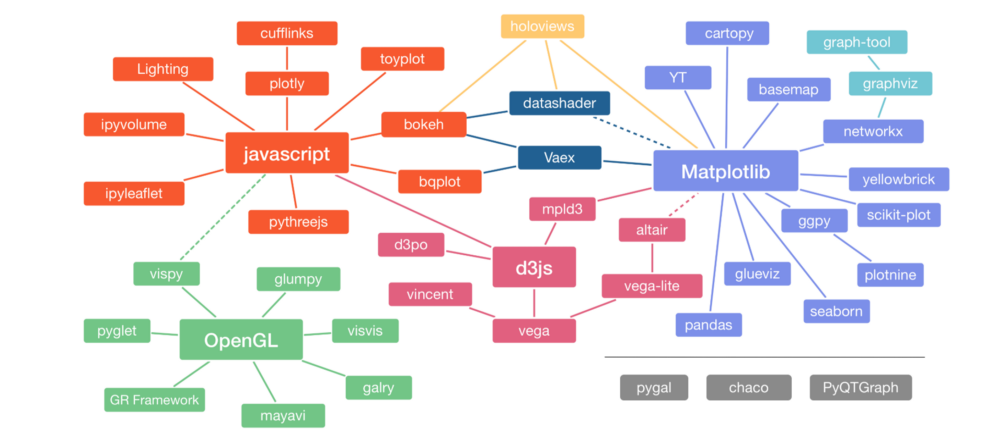

## Matplotlib

### Principe

Matplotlib remonte à l'époque où l'outil de référence pour faire de la manipulation et de la visualisation de données est Matlab ! Numpy a apporté le calcul matriciel mais il manque des outils graphiques. Matplotlib cherche donc initialement à copier ce qui se fait en Matlab. L'objectif est de concevoir un équivalent gratuit et open source à Matlab, pour venir le concurrencer.

Matplotlib reprend différents concepts de Matlab :

1. Une **Figure** comprend un ou plusieurs graphiques. On peut avoir plusieurs figure.

1. Un **Axes** est un ensemble d'axes, c'est-à-dire un graphique sur lequel on peut tracer des données.

1. Un **Axis** est un axe du graphique (abscisses, ordonnées, ...)

Il existe deux façons de faire un graphique :

1. On peut manipuler ces objets (figure, axes, ...) avec une approche programmation orientée objet
1. On peut utiliser Pyplot, un module de Matplotlib, qui se veut plus facile à utiliser en gérant les aspects techniques à notre place et en gérant l'état du graphique (axes courant, ...)

Pour les données à tracer, Matplotlib utilise des tableaux Numpy. Néanmoins tout objet qui peut être converti directement peut être utilisé (listes, séries Pandas, ...)

### Faire un graphique simple

Pour commencer, on importe Pyplot sous son alias usuel.

In [53]:
import matplotlib.pyplot as plt

Dans un notebook Jupyter, une petite manipulation est nécessaire pour afficher directement les graphiques.

In [54]:
%matplotlib inline

Le graphique le plus simple se fait avec la fonction *plot* de Pyplot, en lui fournissant la liste des abscisses en premier argument et la liste des ordonnées en deuxième argument.

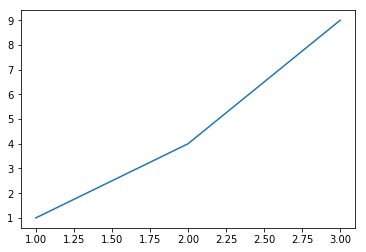

In [55]:
plt.plot([1, 2, 3], [1, 4, 9])

D'autres fonctions sont disponibles pour les autres types de graphiques.

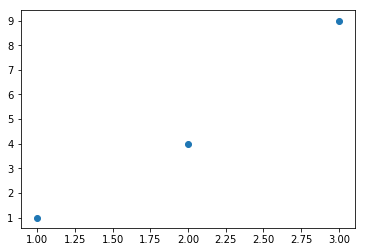

In [56]:
plt.scatter([1, 2, 3], [1, 4, 9])

Dans l'approche orientée objet, on crée d'abord la figure et les axes et on utilise les méthodes de ces objets. Cela peut s'avérer plus simple si on réalise plusieurs graphiques à la fois.

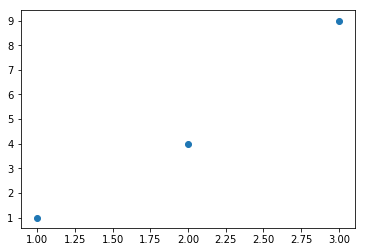

In [57]:
fig, ax = plt.subplots()

ax.scatter([1, 2, 3], [1, 4, 9])

### Personnalisation

Tous les éléments du graphique sont personnalisables.

Text(0,0.5,'Ordonnées')

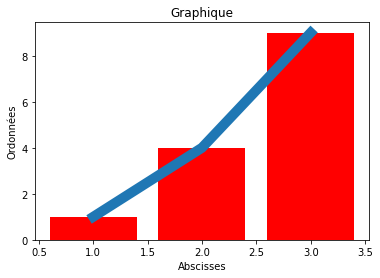

In [58]:
plt.bar([1, 2, 3], [1, 4, 9], color='red')
plt.plot([1, 2, 3], [1, 4, 9], linewidth=10)
plt.title('Graphique')

plt.xlabel('Abscisses')
plt.ylabel('Ordonnées')

On peut s'inspirer de la galerie d'exemples disponible sur le site de Matplotlib : https://matplotlib.org/gallery/index.html

### Utiliser des data frames Pandas 

Pour illustrer l'utilisation de Matplotlib à partir de data frames Pandas, chargeons le jeu de données classique Iris.

In [59]:
iris = pd.read_csv('iris.csv')

iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


On peut utiliser Matplotlib directement en lui donnant des Series, qui peuvent être converties directement tableaux Numpy.

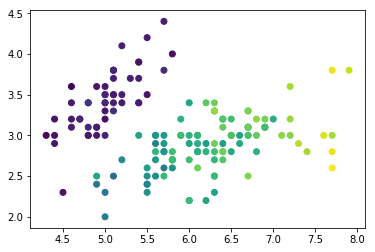

In [60]:
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['petal_length'])

Matplotlib fournit aussi l'argument *data* qui permet de donner le data frame et de ne faire référence qu'aux noms des colonnes.

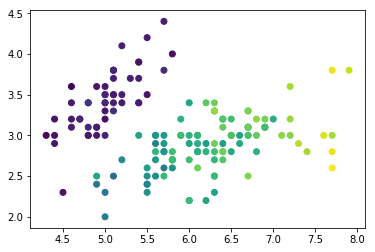

In [61]:
plt.scatter('sepal_length', 'sepal_width', c='petal_length', data=iris)

Pandas fournit aussi une interface s'appuyrant sur Matplotlib. Il faut pour cela utiliser la méthode *plot* du data frame (pour des lignes) ou les méthodes plot.scatter (pour des nuages de points), plot.bar (pour des histogrammes) , ...

### Limitations

Matplotlib a une approche bas niveau : on définit ce qu'on trace élément par élément. Cela permet d'avoir quelque chose de très polyvalent mais peut s'avérer laborieux pour certains graphiques.

Les packages plus récents ont une approche plutôt "grammar of graphics". Dans cette approche, introduite en 1999 par Leland Wilkinson et notamment implémentée par Hadley Wickham dans ggplot2, on décrit les différents composants syntaxiques du graphique (données, conversions esthétiques, géométries, échelles, ...).

Pour illustrer cela, essayons de tracer le graphique précédent mais en utilisant l'espèce pour colorer les points.

Erreur : setosa n'est pas une couleur !


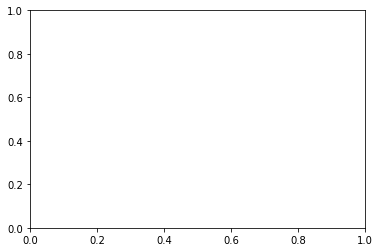

In [62]:
try:
    plt.scatter('sepal_length', 'sepal_width', c='species', data=iris)
except:
    print("Erreur : setosa n'est pas une couleur !")

Matplotlib demande de spécifier exactement la couleur, et ne sait pas encoder des variables catégorielles. Il faut donc le faire manuellement.

On peut par exemple pré-calculer la couleur.

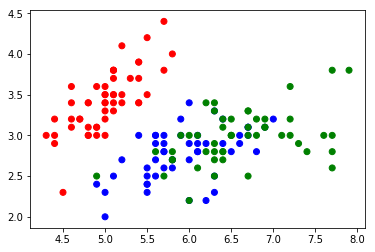

In [63]:
palette = {'setosa': 'red',
          'versicolor': 'blue',
           'virginica': 'green'}

iris['couleur'] = iris['species'].map(palette)

plt.scatter('sepal_length', 'sepal_width', c='couleur', data=iris)


Ou bien on peut boucler sur les différentes espèces pour superposer trois nuages de points.

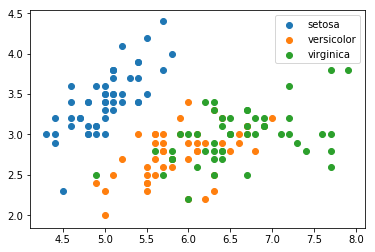

In [64]:
for espece in iris['species'].unique():
    plt.scatter('sepal_length', 'sepal_width', data=iris[iris['species']==espece], label=espece)
    
plt.legend()

In [70]:
# !pip install altair

In [68]:
import altair as alt
#alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [69]:
alt.Chart(iris).mark_point().encode(x='sepal_length', y='sepal_width').interactive()

# Scikit Learn